## 3. Analyze Data

[Data Science Playlist on YouTube](https://www.youtube.com/watch?v=5yv_ID4YNTI&list=PLLBUgWXdTBDg1Qgmwt4jKtVn9BWh5-zgy)
[![Python Data Science](https://apmonitor.com/che263/uploads/Begin_Python/DataScience03.png)](https://www.youtube.com/watch?v=5yv_ID4YNTI&list=PLLBUgWXdTBDg1Qgmwt4jKtVn9BWh5-zgy "Python Data Science")

Once data is read into Python, a first step is to analyze the data with summary statistics. This is especially true if the data set is large. Summary statistics include the count, mean, standard deviation, maximum, minimum, and quartile information for the data columns. 

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Generate Data

Run the next cell to:

- Generate `n` linearly spaced values betweeen `0` and `n-1` with `np.linspace(start,end,count)`
- Draw random samples from a uniform distribution between 0 and 1 with `np.random.rand(count)`
- Draw random samples from a normal (Gaussian) distribution with `np.random.normal(mean,std,count)`
- Combine `time`, `x`, and `y` with a vertical stack `np.vstack` and transpose `.T` for column oriented data.
- Save CSV text file `03-data.csv` with header `time,x,y`.

In [1]:
import numpy as np
np.random.seed(0)
n = 1000
time = np.linspace(0,n-1,n)
x = np.random.rand(n)
y = np.random.normal(1,1,n)
data = np.vstack((time,x,y)).T
np.savetxt('03-data.csv',data,header='time,x,y',delimiter=',',comments='')

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Display Data Distributions

The histogram is a preview of how to create graphics so that data can be evaluated visually. [04. Visualize](https://github.com/APMonitor/data_science/blob/master/04.%20Visualize.ipynb) shows how to create plots to analyze data. 

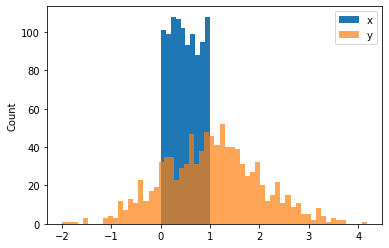

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(x,10,label='x')
plt.hist(y,60,label='y',alpha=0.7)
plt.ylabel('Count'); plt.legend()
plt.show()

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Data Analysis with `numpy`

The `np.loadtxt` function reads the CSV data file `03-data.csv`. Numpy calculates `size` (dimensions), `mean` (average), `std` (standard deviation), and `median` as summary statistics. If you don't specify the `axis` then `numpy` gives a statistic across both the rows (`axis=0`) and columns (`axis=1`).

In [3]:
import numpy as np
data = np.loadtxt('03-data.csv',delimiter=',',skiprows=1)

print('Dimension (rows,columns):')
print(np.size(data,0),np.size(data,1))

print('Average:')
print(np.mean(data,axis=0))

print('Standard Deviation:')
print(np.std(data,0))

print('Median:')
print(np.median(data,0))

Dimension (rows,columns):
1000 3
Average:
[4.99500000e+02 4.95921534e-01 1.02904418e+00]
Standard Deviation:
[288.67499026   0.29059884   0.96616883]
Median:
[4.99500000e+02 4.81322565e-01 1.03093469e+00]


![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Analyze data

1. Calculate the mean, standard deviation, and median of `x*y`
2. Calculate the `skew` of `x*y` with the `scipy.stats` [skew function](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.skew.html).

In [4]:
print(np.mean(x*y), np.std(x*y), np.median(x*y))

from scipy.stats import skew
skew(x*y)

0.5021305639783985 0.628181267249509 0.35459902459887327


1.1973986839553572

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Data Analysis with `pandas`

Pandas simplifies the data analysis with the `.describe()` function that is a method of `DataFrame` that is created with `pd.read_csv()`. Note that the data file can either be a local file name or a web-address such as 

```python
url='http://apmonitor.com/pdc/uploads/Main/tclab_data2.txt'
data = pd.read_csv(url)
data.describe()
```

In [5]:
import pandas as pd
data = pd.read_csv('03-data.csv')
data.describe()

,time,x,y
count,1000.000000,1000.000000,1000.000000
mean,499.500000,0.495922,1.029044
std,288.819436,0.290744,0.966652
min,0.000000,0.000546,-1.994613
25%,249.750000,0.247613,0.352914
50%,499.500000,0.481323,1.030935
75%,749.250000,0.737260,1.637332
max,999.000000,0.999809,4.170975


![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Data Analysis with `pandas-profiling`

Pandas Profiling is a data analysis tool for a more in-depth summary of the data than the `descibe()` function. [Install the package](https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/installation.html) with:

```python
pip install --user pandas-profiling[notebook]
jupyter nbextension enable --py widgetsnbextension
```

You need to restart the Kernel before proceeding. The install only needs to run once.

In [6]:
try:
    import pandas as pd
    from pandas_profiling import ProfileReport
    import os
except:
    !pip install --user pandas-profiling
    !jupyter nbextension enable --py widgetsnbextension
    print('Restart the Kernel before proceeding')
    
# import data
url='http://apmonitor.com/pdc/uploads/Main/tclab_data2.txt'
data = pd.read_csv(url)

After you install `pandas-profiling` and enable the widget extension, you can now import and analysis data. Some of the functions take a long time with a large data set. Two methods for dealing with large data sets are to:

1. Sub-sample the data sets such as with `data = data[::10]` to take every 10th row.
2. Use the `minimal` option to avoid the correlation and other analysis that is slow with large data sets. 

In [7]:
profile = ProfileReport(data, explorative=True, minimal=False)

The profile report can be saved as an interactive web-page. The web-page is saved to the current working directory that is displayed with `os.getcwd()`.

In [8]:
profile.to_file('report.html')
print('File report.html saved to '+os.getcwd())

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 909.63it/s]

File report.html saved to /home/curtis/classes/dynamic_optmization/data_science-master


The profile report can also be viewed in the Jupyter Notebook.

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### TCLab Activity

![connections](https://apmonitor.com/che263/uploads/Begin_Python/connections.png)

### Generate Data Set 1 

Generate a file from the TCLab data with seconds (`t`), heater levels (`Q1` and `Q2`), and temperatures (`lab.T1` and `lab.T2`). Record data every second for 120 seconds and change the heater levels every 30 seconds to a random number between 0 and 80 with `np.random.randint()`. There is no need to change this program, only run it for 2 minutes to collect the data. If you do not have a TCLab device, read a data file 1 from [an online link](https://apmonitor.com/do/uploads/Main/tclab_dyn_data2.txt).

In [10]:
import tclab, time, csv
import pandas as pd
import numpy as np
try:
    # connect to TCLab if available
    n = 120 
    with open('03-tclab1.csv',mode='w',newline='') as f:
        cw = csv.writer(f)
        cw.writerow(['Time','Q1','Q2','T1','T2'])
        with tclab.TCLab() as lab:
            print('t Q1 Q2 T1    T2')
            for t in range(n):
                if t%30==0:
                    Q1 = np.random.randint(0,81)
                    Q2 = np.random.randint(0,81)
                    lab.Q1(Q1); lab.Q2(Q2)
                cw.writerow([t,Q1,Q2,lab.T1,lab.T2])
                if t%5==0:
                    print(t,Q1,Q2,lab.T1,lab.T2)
                time.sleep(1)
    file = '03-tclab1.csv'
    data1=pd.read_csv(file)
except:
    print('No TCLab device found, reading online file')
    url = 'http://apmonitor.com/do/uploads/Main/tclab_dyn_data2.txt'
    data1=pd.read_csv(url)

TCLab version 0.4.9
Arduino Leonardo connected on port /dev/ttyACM1 at 115200 baud.
TCLab Firmware 2.0.1 Arduino Leonardo/Micro.
t Q1 Q2 T1    T2
0 52 75 25.152 25.088
5 52 75 25.281 25.185
10 52 75 25.7 25.571
15 52 75 26.28 26.087
20 52 75 27.021 26.538
25 52 75 27.827 27.021
30 53 67 28.923 27.505
35 53 67 29.922 28.536
40 53 67 31.211 29.632
45 53 67 32.5 30.244
50 53 67 33.467 31.082
55 53 67 34.595 31.823
60 44 2 35.723 32.468
65 44 2 36.754 33.145
70 44 2 37.656 33.563
75 44 2 38.623 33.982
80 44 2 39.332 34.079
85 44 2 40.234 34.401
90 60 66 40.879 34.724
95 60 66 41.523 34.724
100 60 66 42.458 35.11
105 60 66 43.103 35.271
110 60 66 43.779 35.852
115 60 66 44.746 36.464
TCLab disconnected successfully.


### Read Data Set 2

Use `requests` to download a sample TCLab data file for the analysis. It is saved as `03-tclab2.csv`.

In [11]:
import requests
import os
url = 'http://apmonitor.com/pdc/uploads/Main/tclab_data2.txt'
r = requests.get(url)
with open('03-tclab2.csv', 'wb') as f:
    f.write(r.content)
    
print('File 03-tclab2.csv retrieved to current working directory: ')
print(os.getcwd())

File 03-tclab2.csv retrieved to current working directory: 
/home/curtis/classes/dynamic_optmization/data_science-master


### Data Analysis

Read the files `03-tclab1.csv` and `03-tclab2.csv` and display summary statistics for each with `data.describe()`. Use the summary statistics to compare the number of samples and differences in average and standard deviation value for `T1` and `T2`.

In [31]:
data1 = pd.read_csv('03-tclab1.csv')
data2 = pd.read_csv('03-tclab2.csv')
data1

,Time,Q1,Q2,T1,T2
0,0,52,75,25.185,25.346
1,1,52,75,25.120,25.346
2,2,52,75,25.120,25.056
3,3,52,75,25.088,25.410
4,4,52,75,25.120,25.088
...,...,...,...,...,...
115,115,60,66,44.714,36.271
116,116,60,66,44.746,36.432
117,117,60,66,45.068,36.625
118,118,60,66,45.068,36.851


In [28]:
sum1 = data1.describe()
sum2 = data2.describe()
sum1

,Time,Q1,Q2,T1,T2
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,59.500000,52.250000,52.500000,35.001350,31.313842
std,34.785054,5.697191,29.487214,6.496461,3.761548
min,0.000000,44.000000,2.000000,25.088000,25.056000
25%,29.750000,50.000000,50.000000,28.785500,27.762750
50%,59.500000,52.500000,66.500000,35.545500,32.387000
75%,89.250000,54.750000,69.000000,40.782250,34.434000
max,119.000000,60.000000,75.000000,45.391000,37.044000


In [26]:
print(sum1['T1']['count'] - sum2['T1']['count'])
print(sum1['T2']['count'] - sum2['T2']['count'])

-481.0
-481.0


In [27]:
print(sum1['T1']['mean'] - sum2['T1']['mean'])
print(sum1['T2']['mean'] - sum2['T2']['mean'])


-25.96761838602329
-10.481965321686083


In [29]:
print(sum1['T1']['std'] - sum2['T1']['std'])
print(sum1['T2']['std'] - sum2['T2']['std'])


-8.452731722923627
-9.677721691051412


Use the `pandas-profiling` package to generate a data analysis report. View the distribution and correlation of the variables `Q1` and `T1`. 

In [30]:
profile = ProfileReport(data1, explorative=True, minimal=False)
profile.to_file('report.html')
print('File report.html saved to '+os.getcwd())

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 1091.13it/s]

File report.html saved to /home/curtis/classes/dynamic_optmization/data_science-master
